<a href="https://colab.research.google.com/github/ubsuny/MC-CP2P2024/blob/main/mc_simulation_2level_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qutip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

10.0%. Run time:   6.20s. Est. time left: 00:00:00:55
20.0%. Run time:  10.45s. Est. time left: 00:00:00:41
30.0%. Run time:  16.13s. Est. time left: 00:00:00:37
40.0%. Run time:  19.92s. Est. time left: 00:00:00:29
50.0%. Run time:  23.38s. Est. time left: 00:00:00:23
60.0%. Run time:  26.49s. Est. time left: 00:00:00:17
70.0%. Run time:  29.14s. Est. time left: 00:00:00:12
80.0%. Run time:  31.21s. Est. time left: 00:00:00:07
90.0%. Run time:  32.95s. Est. time left: 00:00:00:03
100.0%. Run time:  34.71s. Est. time left: 00:00:00:00
Total run time:  34.73s


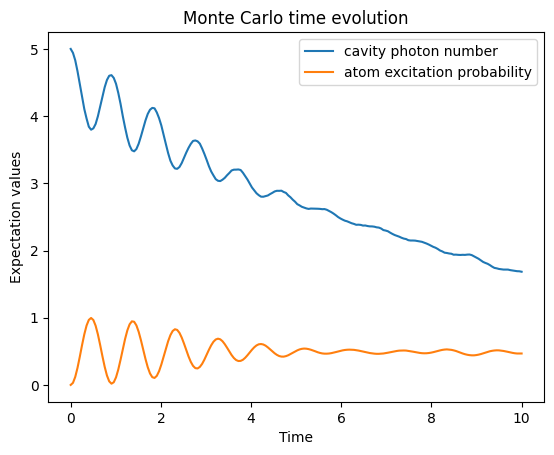

In [3]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])

plt.figure()
plt.plot(times, data.expect[0], times, data.expect[1])
plt.title('Monte Carlo time evolution')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

In [4]:
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], ntraj=1000)

10.0%. Run time:   3.74s. Est. time left: 00:00:00:33
20.0%. Run time:   8.49s. Est. time left: 00:00:00:33
30.0%. Run time:  12.20s. Est. time left: 00:00:00:28
40.0%. Run time:  15.83s. Est. time left: 00:00:00:23
50.0%. Run time:  20.54s. Est. time left: 00:00:00:20
60.0%. Run time:  24.36s. Est. time left: 00:00:00:16
70.0%. Run time:  27.95s. Est. time left: 00:00:00:11
80.0%. Run time:  31.78s. Est. time left: 00:00:00:07
90.0%. Run time:  36.33s. Est. time left: 00:00:00:04
100.0%. Run time:  40.02s. Est. time left: 00:00:00:00
Total run time:  40.04s


In [5]:
ntraj = [1, 10, 100, 1000]


In [6]:
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], ntraj=[1, 10, 100, 1000])


10.0%. Run time:   3.82s. Est. time left: 00:00:00:34
20.0%. Run time:   8.51s. Est. time left: 00:00:00:34
30.0%. Run time:  12.28s. Est. time left: 00:00:00:28
40.0%. Run time:  15.94s. Est. time left: 00:00:00:23
50.0%. Run time:  20.62s. Est. time left: 00:00:00:20
60.0%. Run time:  24.40s. Est. time left: 00:00:00:16
70.0%. Run time:  27.94s. Est. time left: 00:00:00:11
80.0%. Run time:  32.06s. Est. time left: 00:00:00:08
90.0%. Run time:  36.55s. Est. time left: 00:00:00:04
100.0%. Run time:  40.18s. Est. time left: 00:00:00:00
Total run time:  40.19s


In [7]:
expt1 = data.expect[0]
expt10 = data.expect[1]
expt100 = data.expect[2]
expt1000 = data.expect[3]

In [ ]:
print(expt1)

[array([5.        , 4.96909284, 4.87992406, 4.7432741 , 4.5760762 ,
       4.39931266, 4.23521705, 4.1043431 , 4.0228774 , 4.00061628,
       4.03987968, 4.13543318, 4.27531797, 4.44240881, 4.6164575 ,
       4.77643143, 4.90289064, 4.98026415, 4.99874588, 4.95563043,
       4.8558492 , 4.7115496 , 4.54067505, 4.36467879, 4.20570396,
       4.08362598, 4.01348112, 4.00361995, 4.05482437, 4.16042062,
       4.30726823, 4.47743745, 4.65033167, 4.80504908, 4.92275189,
       4.98888741, 4.99498907, 4.93986935, 4.82997324, 4.67875463,
       4.50506684, 4.33074182, 4.17769534, 4.06502065, 4.00653387,
       4.00910469, 4.07197971, 4.1870829 , 4.34016299, 4.51257444,
       4.68346684, 4.83216273, 4.94051824, 4.99507177, 4.98874515,
       4.92188306, 4.80241878, 4.64504833, 4.46943754, 4.29767325,
       4.15133063, 4.04862043, 4.00206827, 4.01703795, 4.0912539 ,
       4.21528513, 4.37383912, 4.54764653, 4.71569769, 4.85763713,
       4.95609912, 4.99878314, 4.98004232, 4.90175992, 4.7733

In [ ]:
print(type(expt1))


<class 'list'>


In [8]:
options = Options(rhs_reuse=True)

10.0%. Run time:   1.96s. Est. time left: 00:00:00:17
20.0%. Run time:   6.58s. Est. time left: 00:00:00:26
30.0%. Run time:   9.58s. Est. time left: 00:00:00:22
40.0%. Run time:  12.86s. Est. time left: 00:00:00:19
50.0%. Run time:  16.05s. Est. time left: 00:00:00:16
60.0%. Run time:  19.04s. Est. time left: 00:00:00:12
70.0%. Run time:  20.79s. Est. time left: 00:00:00:08
80.0%. Run time:  22.54s. Est. time left: 00:00:00:05
90.0%. Run time:  24.38s. Est. time left: 00:00:00:02
100.0%. Run time:  26.18s. Est. time left: 00:00:00:00
Total run time:  26.19s
10.0%. Run time:   3.50s. Est. time left: 00:00:00:31
20.0%. Run time:   7.53s. Est. time left: 00:00:00:30
30.0%. Run time:  10.67s. Est. time left: 00:00:00:24
40.0%. Run time:  13.86s. Est. time left: 00:00:00:20
50.0%. Run time:  17.36s. Est. time left: 00:00:00:17
60.0%. Run time:  21.22s. Est. time left: 00:00:00:14
70.0%. Run time:  24.53s. Est. time left: 00:00:00:10
80.0%. Run time:  27.65s. Est. time left: 00:00:00:06
90.

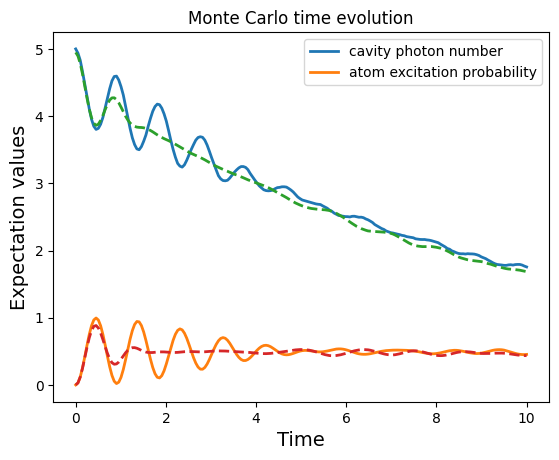

In [9]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data1 = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
psi1 = tensor(fock(2, 0), coherent(10, 2 - 1j))
opts = Options(rhs_reuse=True) # Run a second time, reusing RHS
data2 = mcsolve(H, psi1, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], options=opts)

plt.figure()
plt.plot(times, data1.expect[0], times, data1.expect[1], lw=2)
plt.plot(times, data2.expect[0], '--', times, data2.expect[1], '--', lw=2)
plt.title('Monte Carlo time evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation values', fontsize=14)
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

In [ ]:
print(type(data1))  # Output: <class 'qutip.solver.Result'>
print(type(data2))  # Output: <class 'qutip.solver.Result'>


<class 'qutip.solver.Result'>
<class 'qutip.solver.Result'>


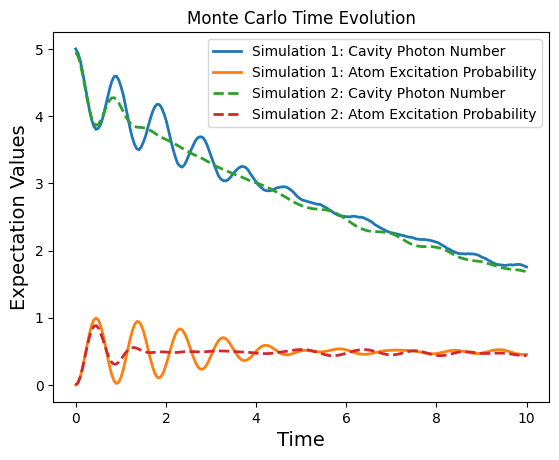

In [10]:
plt.plot(times, data1.expect[0], label='Simulation 1: Cavity Photon Number', lw=2)
plt.plot(times, data1.expect[1], label='Simulation 1: Atom Excitation Probability', lw=2)
plt.plot(times, data2.expect[0], '--', label='Simulation 2: Cavity Photon Number', lw=2)
plt.plot(times, data2.expect[1], '--', label='Simulation 2: Atom Excitation Probability', lw=2)

plt.title('Monte Carlo Time Evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation Values', fontsize=14)
plt.legend()
plt.show()


10.0%. Run time:   3.05s. Est. time left: 00:00:00:27
20.0%. Run time:   4.74s. Est. time left: 00:00:00:18
30.0%. Run time:   6.63s. Est. time left: 00:00:00:15
40.0%. Run time:   8.22s. Est. time left: 00:00:00:12
50.0%. Run time:   9.92s. Est. time left: 00:00:00:09
60.0%. Run time:  11.77s. Est. time left: 00:00:00:07
70.0%. Run time:  13.45s. Est. time left: 00:00:00:05
80.0%. Run time:  14.99s. Est. time left: 00:00:00:03
90.0%. Run time:  16.89s. Est. time left: 00:00:00:01
100.0%. Run time:  18.53s. Est. time left: 00:00:00:00
Total run time:  18.55s
10.0%. Run time:   2.82s. Est. time left: 00:00:00:25
20.0%. Run time:   5.70s. Est. time left: 00:00:00:22
30.0%. Run time:   8.74s. Est. time left: 00:00:00:20
40.0%. Run time:  11.58s. Est. time left: 00:00:00:17
50.0%. Run time:  14.77s. Est. time left: 00:00:00:14
60.0%. Run time:  17.55s. Est. time left: 00:00:00:11
70.0%. Run time:  20.59s. Est. time left: 00:00:00:08
80.0%. Run time:  23.36s. Est. time left: 00:00:00:05
90.

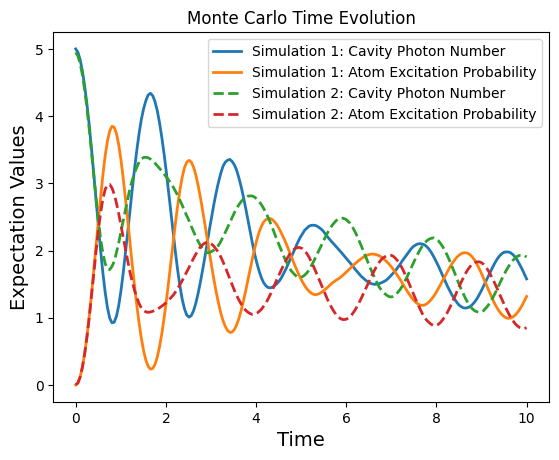

In [5]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(5, 0), fock(10, 5))
a  = tensor(qeye(5), destroy(10))
sm = tensor(destroy(5), qeye(10))

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data1 = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
psi1 = tensor(fock(5, 0), coherent(10, 2 - 1j))
opts = Options(rhs_reuse=True) # Run a second time, reusing RHS
data2 = mcsolve(H, psi1, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], options=opts)

plt.plot(times, data1.expect[0], label='Simulation 1: Cavity Photon Number', lw=2)
plt.plot(times, data1.expect[1], label='Simulation 1: Atom Excitation Probability', lw=2)
plt.plot(times, data2.expect[0], '--', label='Simulation 2: Cavity Photon Number', lw=2)
plt.plot(times, data2.expect[1], '--', label='Simulation 2: Atom Excitation Probability', lw=2)

plt.title('Monte Carlo Time Evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation Values', fontsize=14)
plt.legend()
plt.show()


10.0%. Run time:   3.02s. Est. time left: 00:00:00:27
20.0%. Run time:   6.41s. Est. time left: 00:00:00:25
30.0%. Run time:   8.36s. Est. time left: 00:00:00:19
40.0%. Run time:  10.34s. Est. time left: 00:00:00:15
50.0%. Run time:  12.15s. Est. time left: 00:00:00:12
60.0%. Run time:  14.29s. Est. time left: 00:00:00:09
70.0%. Run time:  16.11s. Est. time left: 00:00:00:06
80.0%. Run time:  17.88s. Est. time left: 00:00:00:04
90.0%. Run time:  19.86s. Est. time left: 00:00:00:02
100.0%. Run time:  21.75s. Est. time left: 00:00:00:00
Total run time:  21.76s
10.0%. Run time:   2.42s. Est. time left: 00:00:00:21
20.0%. Run time:   4.85s. Est. time left: 00:00:00:19
30.0%. Run time:   7.20s. Est. time left: 00:00:00:16
40.0%. Run time:   9.72s. Est. time left: 00:00:00:14
50.0%. Run time:  12.02s. Est. time left: 00:00:00:12
60.0%. Run time:  14.34s. Est. time left: 00:00:00:09
70.0%. Run time:  16.81s. Est. time left: 00:00:00:07
80.0%. Run time:  19.29s. Est. time left: 00:00:00:04
90.

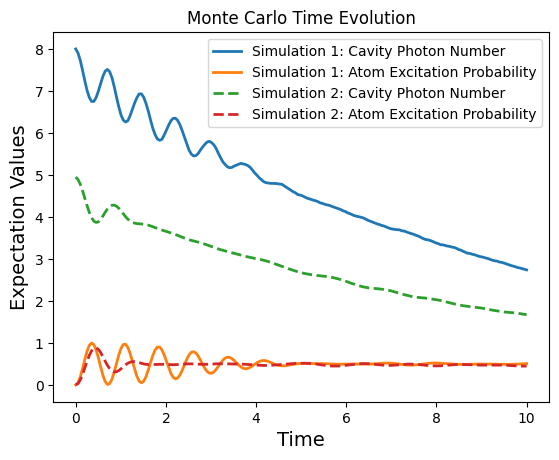

In [6]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 8))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data1 = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
psi1 = tensor(fock(2, 0), coherent(10, 2 - 1j))
opts = Options(rhs_reuse=True) # Run a second time, reusing RHS
data2 = mcsolve(H, psi1, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], options=opts)

plt.plot(times, data1.expect[0], label='Simulation 1: Cavity Photon Number', lw=2)
plt.plot(times, data1.expect[1], label='Simulation 1: Atom Excitation Probability', lw=2)
plt.plot(times, data2.expect[0], '--', label='Simulation 2: Cavity Photon Number', lw=2)
plt.plot(times, data2.expect[1], '--', label='Simulation 2: Atom Excitation Probability', lw=2)

plt.title('Monte Carlo Time Evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation Values', fontsize=14)
plt.legend()
plt.show()


10.0%. Run time:   2.32s. Est. time left: 00:00:00:20
20.0%. Run time:   4.13s. Est. time left: 00:00:00:16
30.0%. Run time:   5.68s. Est. time left: 00:00:00:13
40.0%. Run time:   7.41s. Est. time left: 00:00:00:11
50.0%. Run time:   8.97s. Est. time left: 00:00:00:08
60.0%. Run time:  10.73s. Est. time left: 00:00:00:07
70.0%. Run time:  12.35s. Est. time left: 00:00:00:05
80.0%. Run time:  14.01s. Est. time left: 00:00:00:03
90.0%. Run time:  15.56s. Est. time left: 00:00:00:01
100.0%. Run time:  17.15s. Est. time left: 00:00:00:00
Total run time:  17.16s
10.0%. Run time:   3.00s. Est. time left: 00:00:00:27
20.0%. Run time:   5.62s. Est. time left: 00:00:00:22
30.0%. Run time:   8.37s. Est. time left: 00:00:00:19
40.0%. Run time:  11.08s. Est. time left: 00:00:00:16
50.0%. Run time:  13.93s. Est. time left: 00:00:00:13
60.0%. Run time:  16.58s. Est. time left: 00:00:00:11
70.0%. Run time:  19.48s. Est. time left: 00:00:00:08
80.0%. Run time:  22.21s. Est. time left: 00:00:00:05
90.

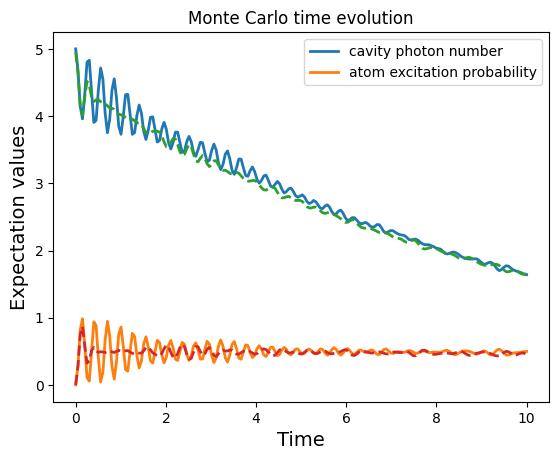

In [7]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.8*(sm*a.dag() + sm.dag()*a)
data1 = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
psi1 = tensor(fock(2, 0), coherent(10, 2 - 1j))
opts = Options(rhs_reuse=True) # Run a second time, reusing RHS
data2 = mcsolve(H, psi1, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], options=opts)

plt.figure()
plt.plot(times, data1.expect[0], times, data1.expect[1], lw=2)
plt.plot(times, data2.expect[0], '--', times, data2.expect[1], '--', lw=2)
plt.title('Monte Carlo time evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation values', fontsize=14)
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

10.0%. Run time:   0.89s. Est. time left: 00:00:00:07
20.0%. Run time:   1.88s. Est. time left: 00:00:00:07
30.0%. Run time:   2.85s. Est. time left: 00:00:00:06
40.0%. Run time:   3.83s. Est. time left: 00:00:00:05
50.0%. Run time:   4.69s. Est. time left: 00:00:00:04
60.0%. Run time:   5.53s. Est. time left: 00:00:00:03
70.0%. Run time:   6.47s. Est. time left: 00:00:00:02
80.0%. Run time:   7.41s. Est. time left: 00:00:00:01
90.0%. Run time:   8.40s. Est. time left: 00:00:00:00
100.0%. Run time:   9.32s. Est. time left: 00:00:00:00
Total run time:   9.33s
10.0%. Run time:   1.94s. Est. time left: 00:00:00:17
20.0%. Run time:   4.06s. Est. time left: 00:00:00:16
30.0%. Run time:   6.13s. Est. time left: 00:00:00:14
40.0%. Run time:   8.26s. Est. time left: 00:00:00:12
50.0%. Run time:  10.18s. Est. time left: 00:00:00:10
60.0%. Run time:  12.13s. Est. time left: 00:00:00:08
70.0%. Run time:  14.27s. Est. time left: 00:00:00:06
80.0%. Run time:  16.42s. Est. time left: 00:00:00:04
90.

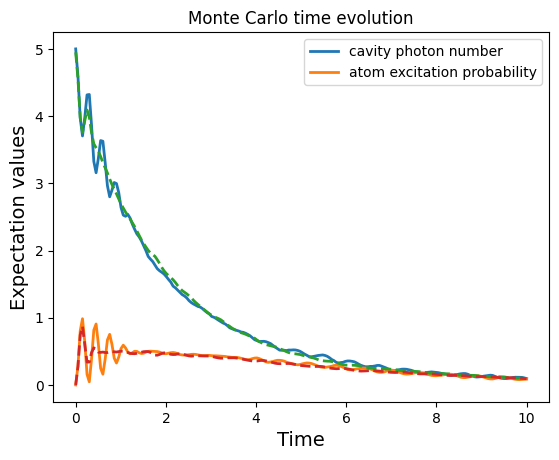

In [8]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.8*(sm*a.dag() + sm.dag()*a)
data1 = mcsolve(H, psi0, times, [np.sqrt(0.5) * a], [a.dag() * a, sm.dag() * sm])
psi1 = tensor(fock(2, 0), coherent(10, 2 - 1j))
opts = Options(rhs_reuse=True) # Run a second time, reusing RHS
data2 = mcsolve(H, psi1, times, [np.sqrt(0.5) * a], [a.dag() * a, sm.dag() * sm], options=opts)

plt.figure()
plt.plot(times, data1.expect[0], times, data1.expect[1], lw=2)
plt.plot(times, data2.expect[0], '--', times, data2.expect[1], '--', lw=2)
plt.title('Monte Carlo time evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation values', fontsize=14)
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()